In [925]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Remove warnings
warnings.filterwarnings('ignore')

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [926]:
# Load the case study dataset

# Update path to the dataset loan.csv
PATH_TO_DATASET = 'Provide path to loan.csv'
loan_ds = pd.read_csv(PATH_TO_DATASET, encoding = 'utf-8')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding**

In [927]:
# The dataset has a dimensionality of 39717 rows and 111 columns

loan_ds.shape

(39717, 111)

In [928]:
# List 5 random sample of rows from the dataset

loan_ds.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
8447,833468,1043064,8300,8300,8275.0,36 months,10.99%,271.70,B,B3,San Gabriel Valley Habitat for Humanity,10+ years,RENT,45020.0,Not Verified,Sep-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Credit Card Consolidation,917xx,CA,13.94,0,Jan-93,0,29.0,NaN,12,0,12035,51.90%,25,f,0.0,0.0,9756.440169,9727.05,8300.00,1456.44,0.0,0.0,0.0000,May-14,1361.82,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
38828,317597,317594,4500,4500,1446.5,36 months,11.97%,149.40,C,C4,US Air Force,10+ years,MORTGAGE,115200.0,Not Verified,Apr-08,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Personnal Loan,home_improvement,Home Project,207xx,MD,15.49,1,Feb-94,1,21.0,NaN,10,0,22625,86.40%,30,f,0.0,0.0,5378.400000,1713.12,4499.99,878.41,0.0,0.0,0.0000,Apr-11,149.40,NaN,Apr-11,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6966,884736,1100197,2400,2400,2400.0,36 months,14.27%,82.35,C,C2,tlc for pets,1 year,MORTGAGE,26000.0,Not Verified,Sep-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 09/19/11 > Thank you very ...,credit_card,pay it off,212xx,MD,21.09,0,Apr-00,1,NaN,100.0,6,1,7623,76.20%,8,f,0.0,0.0,2964.215950,2964.22,2400.00,564.22,0.0,0.0,0.0000,Oct-14,90.16,NaN,Oct-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
36185,419505,492244,20000,20000,13975.0,36 months,11.89%,663.28,B,B4,US Army,10+ years,MORTGAGE,60600.0,Verified,Jul-09,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,"Wishing to improve value, condition, and look...",home_improvement,Home Improvement,368xx,AL,2.89,0,Jun-99,4,NaN,NaN,6,0,6863,46.70%,12,f,0.0,0.0,4493.300000,3139.36,0.00,0.00,0.0,4493.3,1381.4454,NaN,0.00,NaN,Dec-09,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [929]:
# Check for completely empty rows in between the dataset

empty_rows = loan_ds.isna().all(axis=1)
num_empty_rows = empty_rows.sum()

print(f"Number of completely empty rows: {num_empty_rows}")

# Print the indices of completely empty rows
if num_empty_rows > 0:
    print("Indices of completely empty rows:")
    print(loan_ds[empty_rows].index.tolist())
else:
    print("There are no completely empty rows.")


Number of completely empty rows: 0
There are no completely empty rows.


In [930]:
# Identify missing values in the dataset, sorted in ascending order

loan_ds.isna().sum().sort_values()

# loan_ds.isna().mean().sort_values() * 100

id                                    0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
total_acc                             0
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
delinq_2yrs                           0
total_pymnt                           0
total_rec_int                         0
total_rec_late_fee                    0
recoveries                            0
collection_recovery_fee               0
last_pymnt_amnt                       0
policy_code                           0
application_type                      0
acc_now_delinq                        0
delinq_amnt                           0
total_pymnt_inv                       0
dti                                   0
total_rec_prncp                       0
zip_code                              0


In [931]:
# Identifying percentage of columns with non-missing values sorted in Ascending order

completeness = loan_ds.notnull().mean() * 100
completeness.sort_values(ascending=True)

verification_status_joint           0.000000
bc_util                             0.000000
bc_open_to_buy                      0.000000
avg_cur_bal                         0.000000
acc_open_past_24mths                0.000000
inq_last_12m                        0.000000
total_cu_tl                         0.000000
inq_fi                              0.000000
total_rev_hi_lim                    0.000000
all_util                            0.000000
max_bal_bc                          0.000000
mo_sin_old_il_acct                  0.000000
open_rv_24m                         0.000000
il_util                             0.000000
total_bal_il                        0.000000
mths_since_rcnt_il                  0.000000
open_il_24m                         0.000000
open_il_12m                         0.000000
open_il_6m                          0.000000
open_acc_6m                         0.000000
tot_cur_bal                         0.000000
tot_coll_amt                        0.000000
total_bc_l

In [932]:
# Identify all duplicate records in the dataset

loan_ds.duplicated(keep=False).sum()

0

In [933]:
# Identify the data types of each column

loan_ds.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

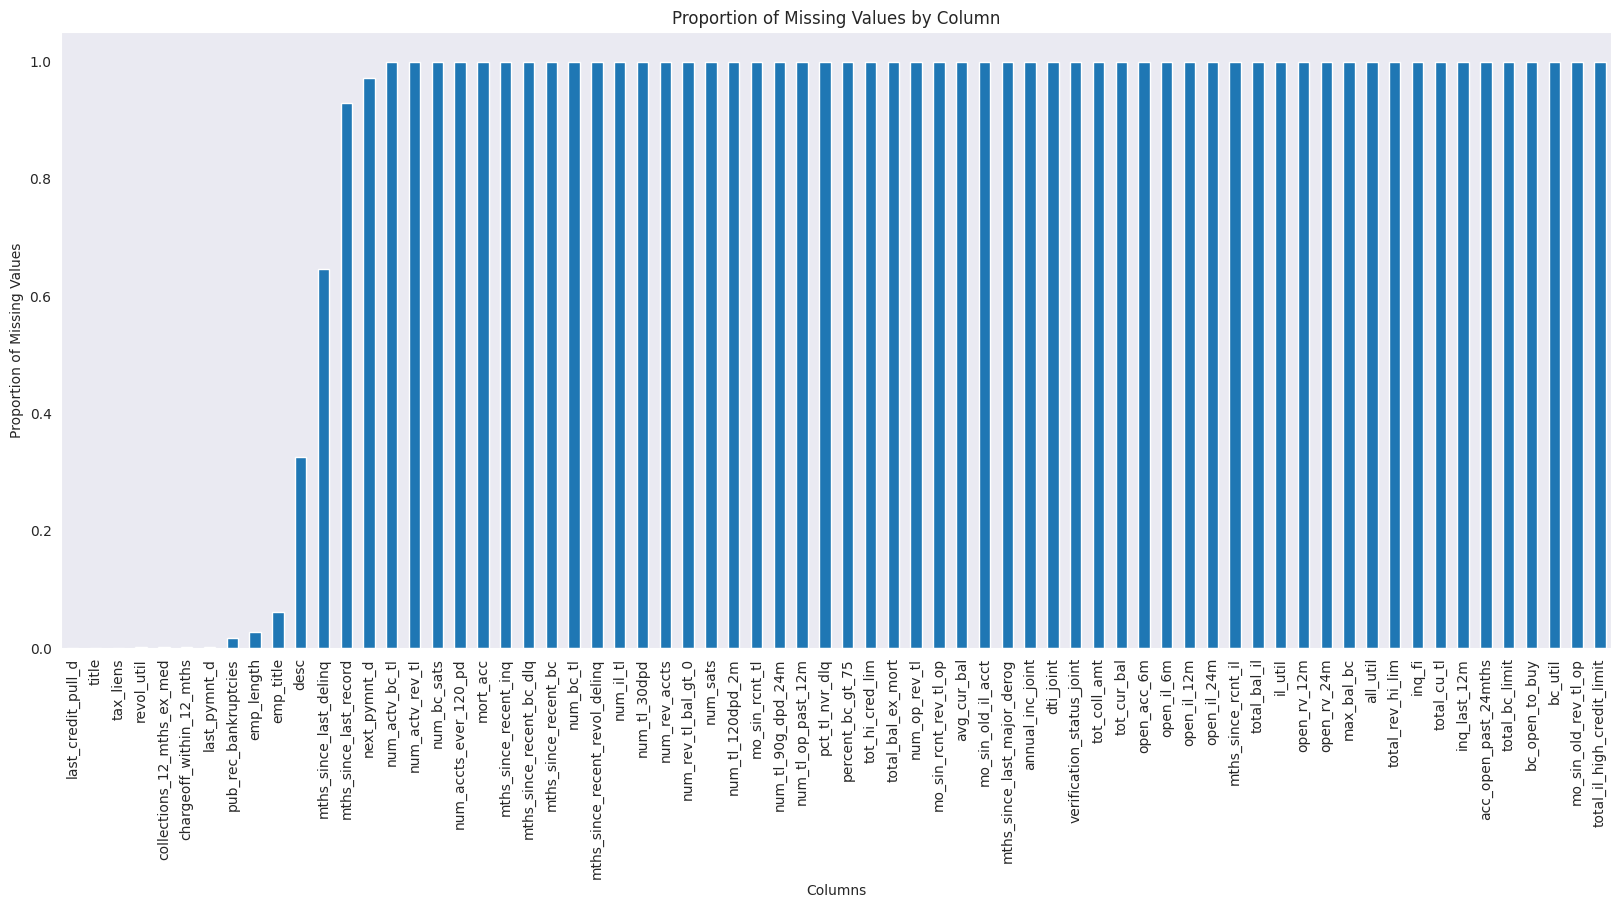

In [934]:
"""
Identify only those columns having missing values through a bar plot
"""

# Calculate the proportion of missing values for each column
missing_proportions = (loan_ds.isna().sum() / loan_ds.shape[0])

# Filter columns with missing values where missing_proportions > 0
missing_proportions = missing_proportions[missing_proportions > 0]

# Sort the proportions
sorted_missing_proportions = missing_proportions.sort_values()

# Plot the missing value proportions
plt.figure(figsize=(20, 8))
sorted_missing_proportions.plot(kind='bar')

plt.xticks(rotation=90)
plt.title('Proportion of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')

# Show the plot
plt.show()



# **Data Pre-processing**

In [935]:
# Identify and drop columns with more than 30% missing values and rows with any missing values from the dataset

all_columns = loan_ds.columns.tolist()
columns_with_high_missing = loan_ds.columns[loan_ds.isna().mean() > 0.3].tolist()
loan_ds.drop(columns_with_high_missing,axis=1,inplace=True)
ds=(loan_ds.isna().mean()*100).sort_values()
loan_ds.shape
loan_ds.dropna(inplace=True)
loan_ds.shape
loan_ds.drop(columns=["title","zip_code","pymnt_plan","url","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"],axis=1,inplace=True)
print(loan_ds.shape)
loan_ds.head()

(36431, 41)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


**From the above analysis, it is identified that all the below columns have no values that can contribute effectively in the decision for loan approval of an applicant. The columns are therefore dropped.**


In [936]:
# Get the current columns after dropping the ones with high missing values
current_columns = loan_ds.columns.tolist()

# Find removed columns
removed_columns = list(set(all_columns) - set(current_columns))

# Find retained columns
retained_columns = list(set(all_columns) & set(current_columns))

data = [("Removed Columns", "Retained Columns")]
max_length = max(len(removed_columns), len(retained_columns))
for i in range(max_length):
    removed = removed_columns[i] if i < len(removed_columns) else ""
    retained = retained_columns[i] if i < len(retained_columns) else ""
    data.append((removed, retained))

print(tabulate(data, headers="firstrow", tablefmt="pipe"))


| Removed Columns                | Retained Columns        |
|:-------------------------------|:------------------------|
| zip_code                       | int_rate                |
| total_cu_tl                    | total_pymnt_inv         |
| open_il_6m                     | id                      |
| acc_now_delinq                 | revol_bal               |
| open_rv_12m                    | out_prncp_inv           |
| open_acc_6m                    | last_pymnt_amnt         |
| pymnt_plan                     | recoveries              |
| num_bc_tl                      | annual_inc              |
| num_rev_tl_bal_gt_0            | sub_grade               |
| num_accts_ever_120_pd          | inq_last_6mths          |
| num_tl_30dpd                   | emp_title               |
| url                            | purpose                 |
| open_il_12m                    | delinq_2yrs             |
| tot_coll_amt                   | verification_status     |
| avg_cur_bal           

In [937]:
# Dimensionality of the dataset post dropping columns

loan_ds.shape

(36431, 41)

In [938]:
 # Convert 'term' column to integer
loan_ds["term"] = loan_ds["term"].str.replace(" months", "").astype("int64")

# Convert percentage columns to float and round to two decimal places
loan_ds['int_rate'] = loan_ds['int_rate'].str.rstrip('%').astype('float64').round(2)
loan_ds['revol_util'] = loan_ds['revol_util'].str.rstrip('%').astype('float64').round(2)
loan_ds['funded_amnt_inv'] = loan_ds['funded_amnt_inv'].round(2)

# List of columns to be rounded to two decimal places
columns_to_round = [
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
    'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt'
]

# Round the specified columns to two decimal places
loan_ds[columns_to_round] = loan_ds[columns_to_round].round(2)

# Clean the 'emp_length' column
loan_ds["emp_length"] = loan_ds["emp_length"].str.replace(r'\+ years', '', regex=True) \
                                             .str.replace(r' years', '', regex=True) \
                                             .str.replace(r' year', '', regex=True) \
                                             .str.replace(r'< 1', '0') \
                                             .str.strip()

# Reformat the column to abbreviated month name and last two digits of the year
loan_ds['issue_d'] = pd.to_datetime(loan_ds['issue_d'], format='%b-%y')
loan_ds['earliest_cr_line'] = pd.to_datetime(loan_ds['earliest_cr_line'], format='%b-%y')
loan_ds['last_pymnt_d'] = pd.to_datetime(loan_ds['last_pymnt_d'], format='%b-%y')
loan_ds['last_credit_pull_d'] = pd.to_datetime(loan_ds['last_credit_pull_d'], format='%b-%y')

# The home_ownership field has 3 rows with values assigned as "NONE". Tagging them to the "OTHER" category
loan_ds['home_ownership'] = loan_ds['home_ownership'].replace('NONE', 'OTHER')


In [939]:
# Revised data types of columns

loan_ds.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                          

In [940]:
# Rename columns to represent the revised values of the column

loan_ds = loan_ds.rename(columns={
    'term': 'term_in_months',
    'revol_util': 'revol_util_in_percent',
    'emp_length': 'emp_length_in_years'
})

In [941]:
loan_ds.shape

(36431, 41)

In [942]:
"""
Here we are summarizing the non-object columns and specifying additional percentiles to identify the data distribution and potential outliers.
In this case, it includes the 5th percentile (0.05) and the 95th percentile (0.95) along with the default ones.
Values below the 5th percentile or above the 95th percentile can be flagged for further investigation.
"""

loan_ds.describe(percentiles=[0.25,0.5,0.75,0.05,0.95], exclude=['object'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util_in_percent,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,3.643100e+04,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,3.643100e+04,36431,36431.000000,36431.000000,36431,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431,36431.000000,36431,36431.000000
mean,6.910141e+05,8.611116e+05,11307.794186,11032.933491,10601.876906,42.624688,12.073891,326.187642,6.930694e+04,2010-11-21 12:11:52.667782656,13.444293,0.146139,1997-05-26 19:45:33.968323584,0.864840,9.351679,0.053663,13466.188740,49.276069,22.246137,52.468572,52.216180,12311.226400,11841.691116,9912.631803,2304.442520,1.299915,92.852238,11.677621,2013-04-29 15:06:25.682523136,2743.075381,2014-09-29 01:44:40.014273536,0.041366
min,5.574200e+04,1.144260e+05,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4.000000e+03,2007-10-01 00:00:00,0.000000,0.000000,1969-02-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,2008-05-01 00:00:00,0.010000,2008-03-01 00:00:00,0.000000
5%,3.865960e+05,4.164115e+05,2400.000000,2400.000000,2000.000000,36.000000,6.170000,74.430000,2.499600e+04,2009-04-01 00:00:00,2.250000,0.000000,1984-11-01 00:00:00,0.000000,4.000000,0.000000,371.000000,3.000000,7.000000,0.000000,0.000000,2015.995000,1671.675000,1450.000000,198.935000,0.000000,0.000000,0.000000,2010-12-01 00:00:00,47.335000,2011-08-01 00:00:00,0.000000
25%,5.226890e+05,6.755430e+05,5600.000000,5500.000000,5000.000000,36.000000,9.320000,168.900000,4.200000e+04,2010-06-01 00:00:00,8.360000,0.000000,1994-01-01 00:00:00,0.000000,6.000000,0.000000,3832.000000,26.100000,14.000000,0.000000,0.000000,5672.635000,5413.880000,4800.000000,678.030000,0.000000,0.000000,0.000000,2012-05-01 00:00:00,226.310000,2013-07-01 00:00:00,0.000000
50%,6.705750e+05,8.569760e+05,10000.000000,10000.000000,9203.370000,36.000000,11.860000,283.280000,6.000000e+04,2011-02-01 00:00:00,13.540000,0.000000,1998-07-01 00:00:00,1.000000,9.000000,0.000000,9031.000000,49.900000,21.000000,0.000000,0.000000,10101.590000,9632.410000,8123.600000,1379.820000,0.000000,0.000000,0.000000,2013-05-01 00:00:00,571.700000,2015-04-01 00:00:00,0.000000
75%,8.399035e+05,1.049794e+06,15000.000000,15000.000000,14508.770000,60.000000,14.650000,432.220000,8.300000e+04,2011-08-01 00:00:00,18.690000,0.000000,2001-10-01 00:00:00,1.000000,12.000000,0.000000,17231.500000,72.700000,29.000000,0.000000,0.000000,16700.865000,16094.780000,14000.000000,2891.865000,0.000000,0.000000,0.000000,2014-06-01 00:00:00,3457.620000,2016-05-01 00:00:00,0.000000
95%,1.040656e+06,1.270430e+06,25000.000000,25000.000000,24750.000000,60.000000,18.620000,759.555000,1.400000e+05,2011-12-01 00:00:00,23.860000,1.000000,2006-02-01 00:00:00,3.000000,18.000000,1.000000,41488.000000,93.600000,43.000000,0.000000,0.000000,30361.310000,29772.965000,24999.990000,7670.010000,0.000000,348.180000,4.930000,2016-01-01 00:00:00,12301.665000,2016-05-01 00:00:00,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,2068-12-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,2016-05-01 00:00:00,36115.200000,2016-05-01 00:00:00,2.000000
std,2.026042e+05,2.538291e+05,7433.904309,7166.520054,7072.645597,10.728

# **Data Analysis**

In [943]:

# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off

In [944]:
# Lets take a look on important variable purpose of loan in total loans issued

(loan_ds.purpose.value_counts()*100)/len(loan_ds)

# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.

purpose
debt_consolidation    47.948176
credit_card           12.972469
other                  9.813071
home_improvement       7.424995
major_purchase         5.511789
car                    3.960912
small_business         3.881310
wedding                2.431995
medical                1.740276
moving                 1.452060
house                  0.941506
vacation               0.922291
educational            0.757597
renewable_energy       0.241553
Name: count, dtype: float64

**Univariate Analysis**

In [945]:
# Basic statistics with .describe() - Quantitative Variables
loan_ds['loan_amnt'].describe()


count    36431.000000
mean     11307.794186
std       7433.904309
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: ylabel='loan_amnt'>

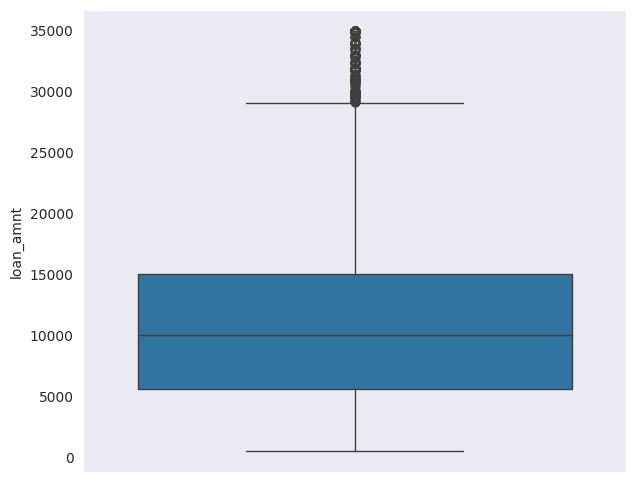

In [946]:
plt.figure(figsize=(7,6))
sns.boxplot(loan_ds.loan_amnt)

<Axes: ylabel='total_pymnt'>

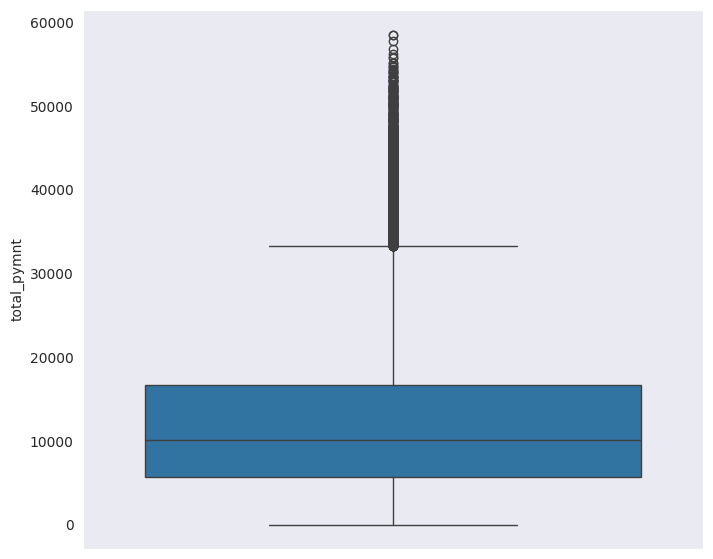

In [947]:
# Basic statistics with .describe() -Quantitative Variables
plt.figure(figsize=(8,7))
loan_ds.total_pymnt.describe()
sns.boxplot(loan_ds.total_pymnt)

In [948]:
loan_ds=loan_ds[loan_ds.annual_inc<140000]# To remove annual_income outliers we consider the annual_income below the value of .95 percentile

<Axes: ylabel='annual_inc'>

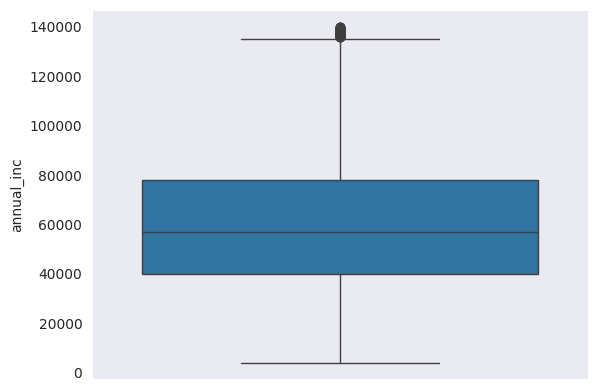

In [949]:
sns.boxplot(loan_ds.annual_inc)

In [950]:
# Basic statistics with .describe() -Quantitative Variables

loan_ds['int_rate'].describe()

# Average intrest rate is 12 %
# after 75% percentile interest rate zoom'ed to 24.5% from 14.5%.

count    34482.000000
mean        12.020878
std          3.703817
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64

**Derived_Columns**

In [951]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan_ds['loan_amnt_cats'] = pd.cut(loan_ds['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan_ds['annual_inc_cats'] = pd.cut(loan_ds['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan_ds['int_rate_cats'] = pd.cut(loan_ds['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan_ds['dti_cats'] = pd.cut(loan_ds['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [952]:
loan_ds.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_in_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util_in_percent,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.0,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0-7000,20000-40000,12.5-16,0-5
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.0,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,7000-14000,40000-60000,12.5-16,15-20


In [953]:
loan_ds.shape

(34482, 45)

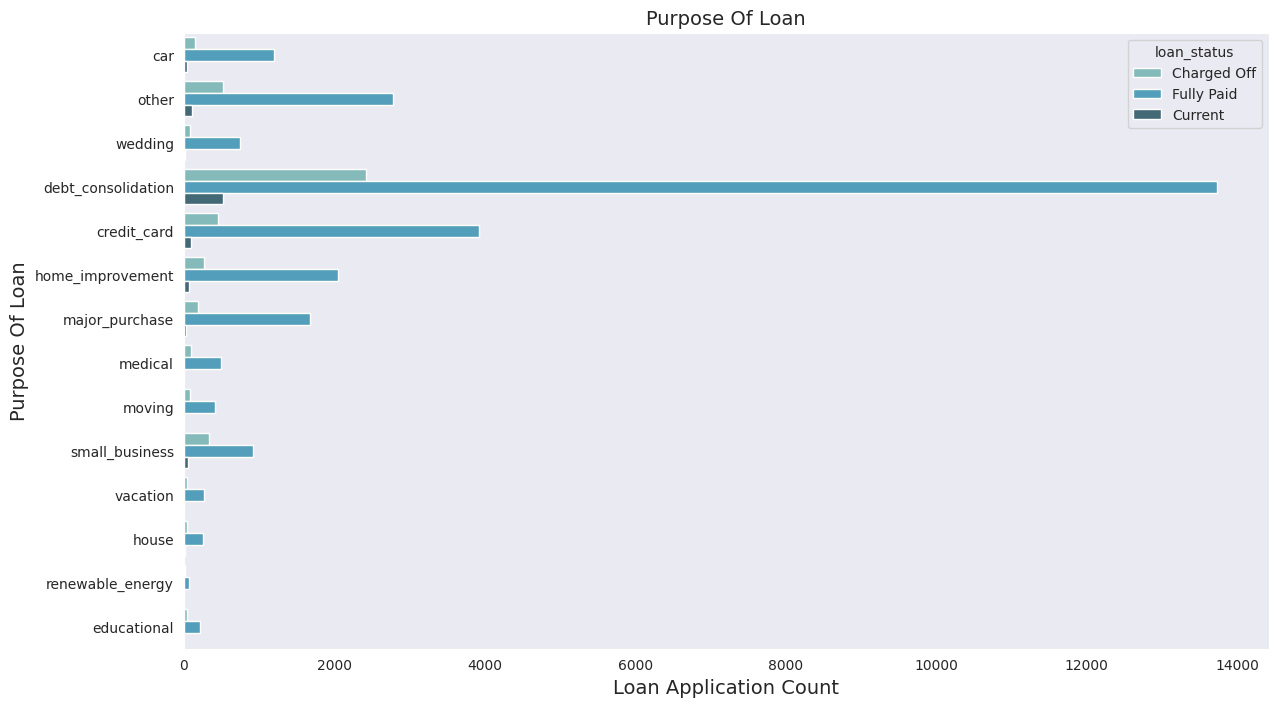

In [954]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan_ds,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14)
ax.set_ylabel('Purpose Of Loan',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

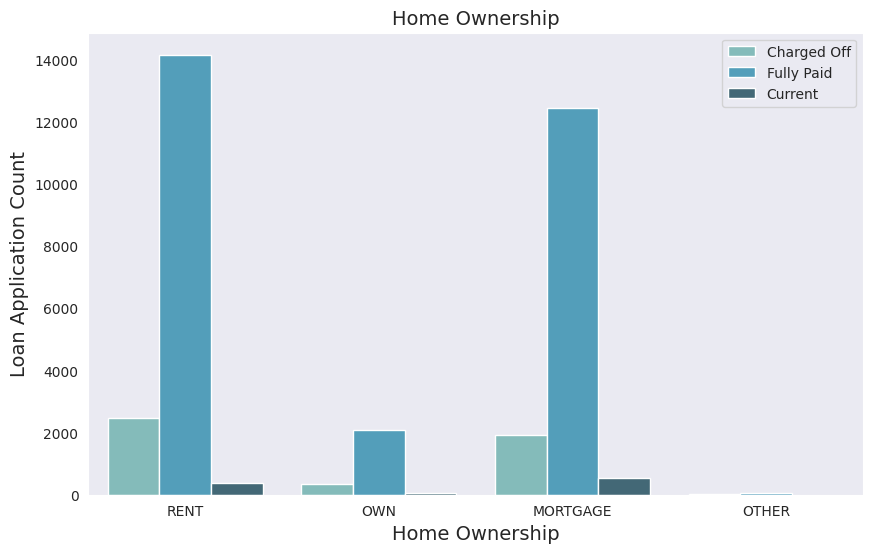

In [955]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=loan_ds,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14)
ax.set_xlabel('Home Ownership',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

In [956]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

loan_ds.issue_d = pd.to_datetime(loan_ds.issue_d, format='%b-%y')
loan_ds['year']=loan_ds['issue_d'].dt.year
loan_ds['month']=loan_ds['issue_d'].dt.month

loan_ds.head(1)

# Observations
# Two new columns month and year were derived from issue date

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_in_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util_in_percent,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats,year,month
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.0,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0-7000,20000-40000,12.5-16,0-5,2011,12


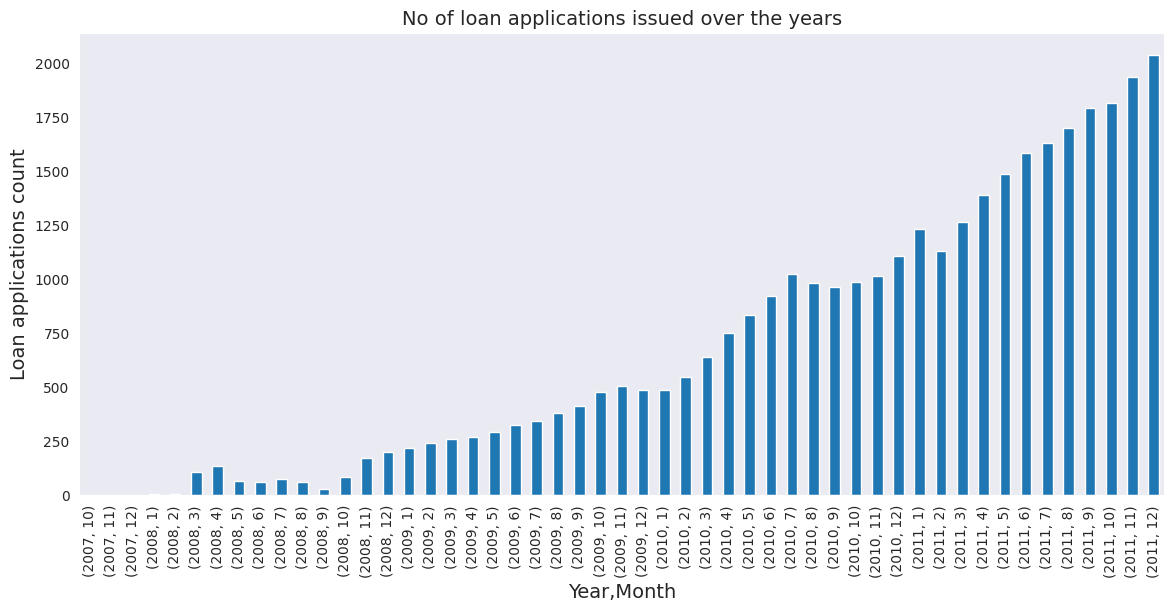

In [957]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6))
loan_ds.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14)
plt.xlabel('Year,Month',fontsize=14)
plt.title("No of loan applications issued over the years",fontsize=14)
plt.show()


# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

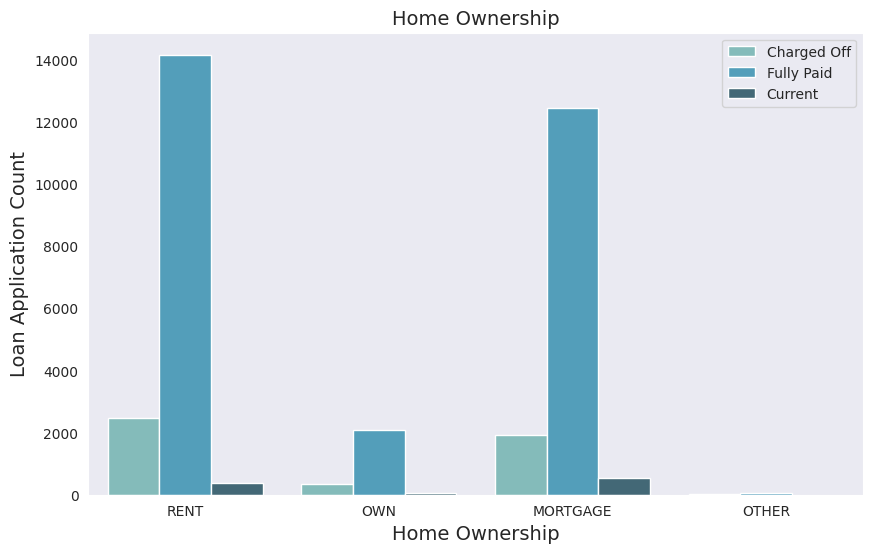

In [958]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=loan_ds,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14)
ax.set_xlabel('Home Ownership',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

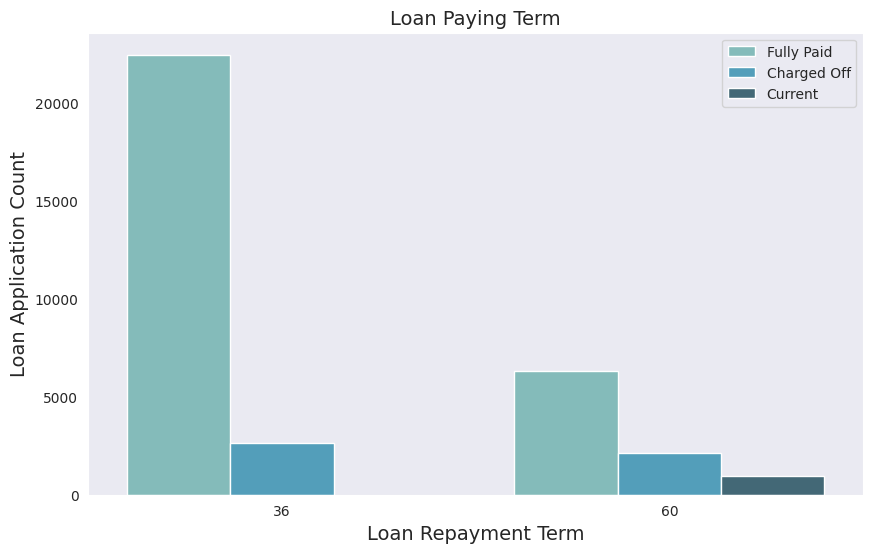

In [959]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6))
ax = sns.countplot(x="term_in_months",data=loan_ds,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14)
ax.set_xlabel('Loan Repayment Term',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting
# charged off as compared to applicants who had taken loan for 36 months.

In [960]:
loan_ds.dropna(inplace=True)

In [961]:
loan_ds.isna().sum().sort_values()

id                         0
revol_bal                  0
revol_util_in_percent      0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
pub_rec                    0
total_rec_late_fee         0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pull_d         0
pub_rec_bankruptcies       0
loan_amnt_cats             0
annual_inc_cats            0
int_rate_cats              0
dti_cats                   0
recoveries                 0
year                       0
open_acc                   0
earliest_cr_line           0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term_in_months             0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
inq_last_6mths

In [962]:
loan_ds.shape

(33017, 47)

Bivariate Analysis : Part **`1`**
#### Bivariate Analysis : # In this part of analysis, lets try to analyze the loan status against some important columns which might have played # important role in charged off of loans. Lets try to find proportion of charged offs in some categories. # To calculate the proportion of charged off loans, will do these below steps: # Group loans by different variables and loan status, get the count,use .unstack() to return a DataFrame. # Since we’re going to use this for further analysis, it will be helpful to use .reset_index() to clean up the index. # Assign the new DataFrame to a variable. # Create a simple derived column that sums charged off,current and fully paid loans for each category. # Divide the number of charged off loans by the total number of loans to get the proportion of charged off loans. # Store this as another derived column. # Finally, output the whole table, sorted by proportion of charged off in each category issued loans.

In [963]:
inc_range_vs_loan = loan_ds.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.


loan_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
annual_inc_cats,,,,,
0-20000,149,5,690,844,0.176540
20000-40000,1240,136,6105,7481,0.165753
40000-60000,1460,279,8620,10359,0.140940
60000-80000,833,193,6005,7031,0.118475
80000 +,720,236,6346,7302,0.098603


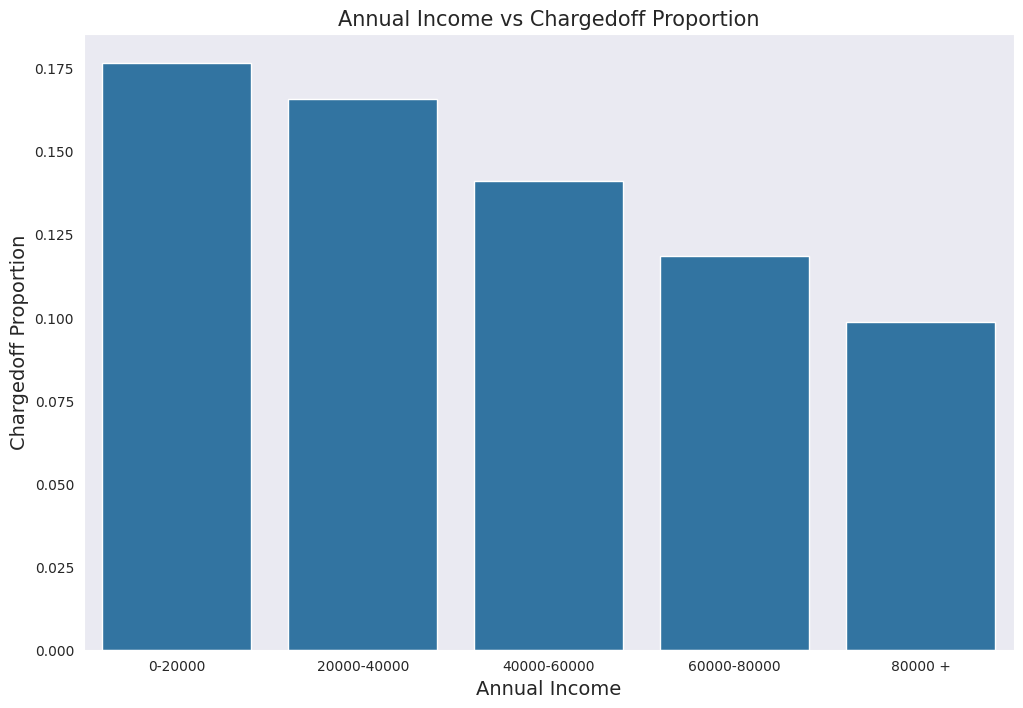

In [964]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [965]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan_ds.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0)
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
purpose,,,,,
small_business,301.0,52.0,871.0,1224.0,0.245915
educational,42.0,0.0,217.0,259.0,0.162162
moving,74.0,5.0,406.0,485.0,0.152577
other,501.0,92.0,2705.0,3298.0,0.151910
medical,88.0,8.0,488.0,584.0,0.150685
renewable_energy,11.0,1.0,63.0,75.0,0.146667
house,43.0,7.0,246.0,296.0,0.145270
vacation,45.0,2.0,267.0,314.0,0.143312
debt_consolidation,2210.0,447.0,13207.0,15864.0,0.139309


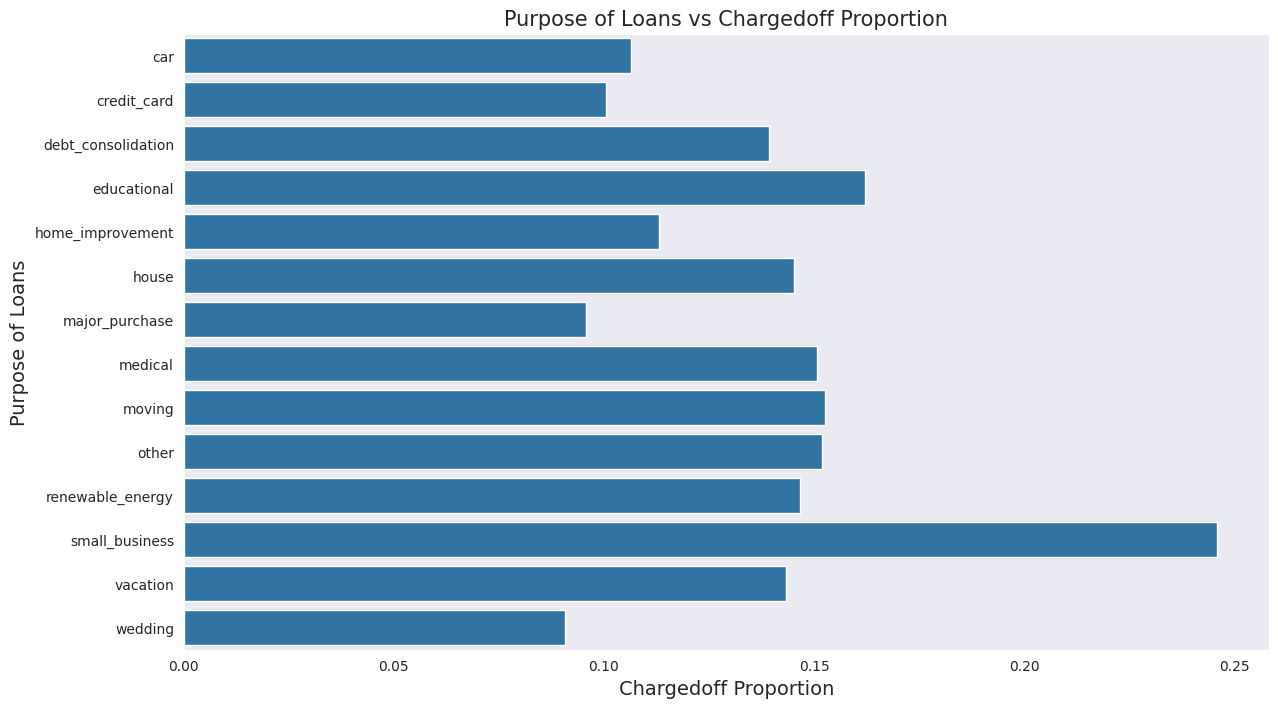

In [966]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [967]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan_ds.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0)
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
grade,,,,,
G,7.0,0.0,15.0,22.0,0.318182
F,121.0,0.0,348.0,469.0,0.257996
E,567.0,140.0,1614.0,2321.0,0.244291
D,930.0,193.0,3449.0,4572.0,0.203412
C,1124.0,222.0,5618.0,6964.0,0.161401
B,1178.0,263.0,8796.0,10237.0,0.115073
A,475.0,31.0,7926.0,8432.0,0.056333


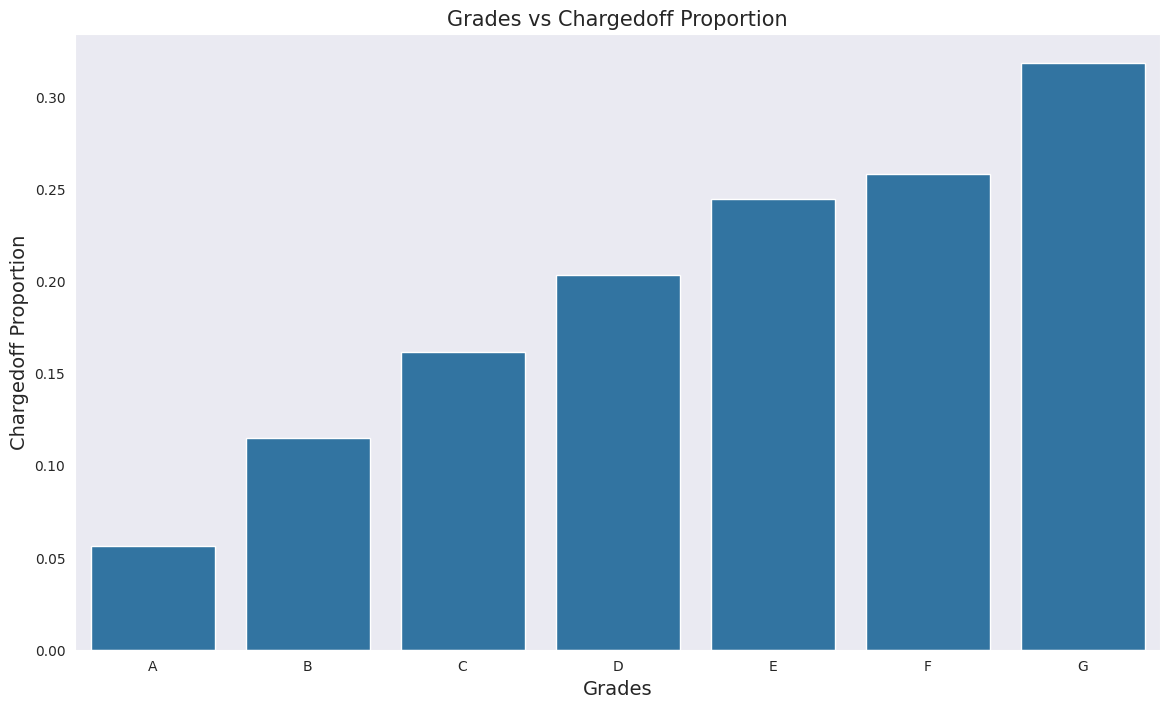

In [968]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [969]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = loan_ds.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0)
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

loan_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
sub_grade,,,,,
G4,2.0,0.0,0.0,2.0,1.000000
G3,1.0,0.0,0.0,1.0,1.000000
F5,19.0,0.0,28.0,47.0,0.404255
G2,1.0,0.0,2.0,3.0,0.333333
F3,25.0,0.0,54.0,79.0,0.316456
F4,19.0,0.0,50.0,69.0,0.275362
E4,106.0,25.0,255.0,386.0,0.274611
E1,172.0,34.0,465.0,671.0,0.256334
E2,135.0,35.0,382.0,552.0,0.244565


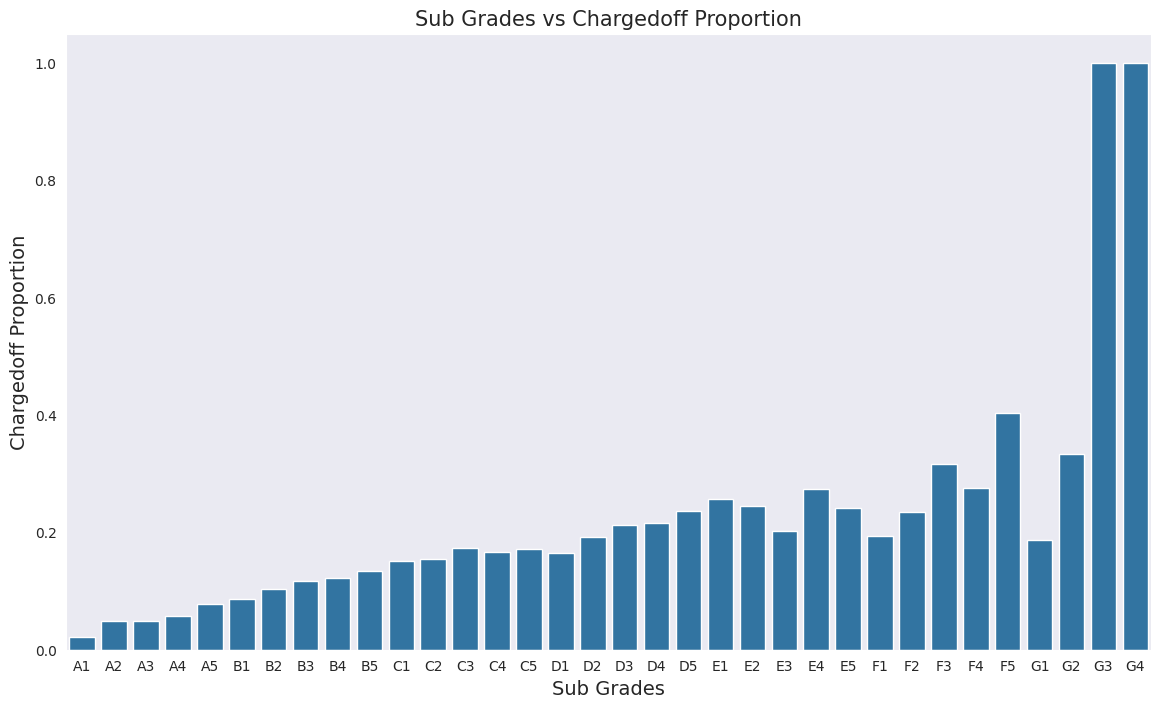

In [970]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G

In [971]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loan_ds.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1073,304,2926,4303,0.249361
2,12.5-16,1686,278,8311,10275,0.164088
1,10-13,1007,208,6926,8141,0.123695
0,0-10,636,59,9603,10298,0.061760


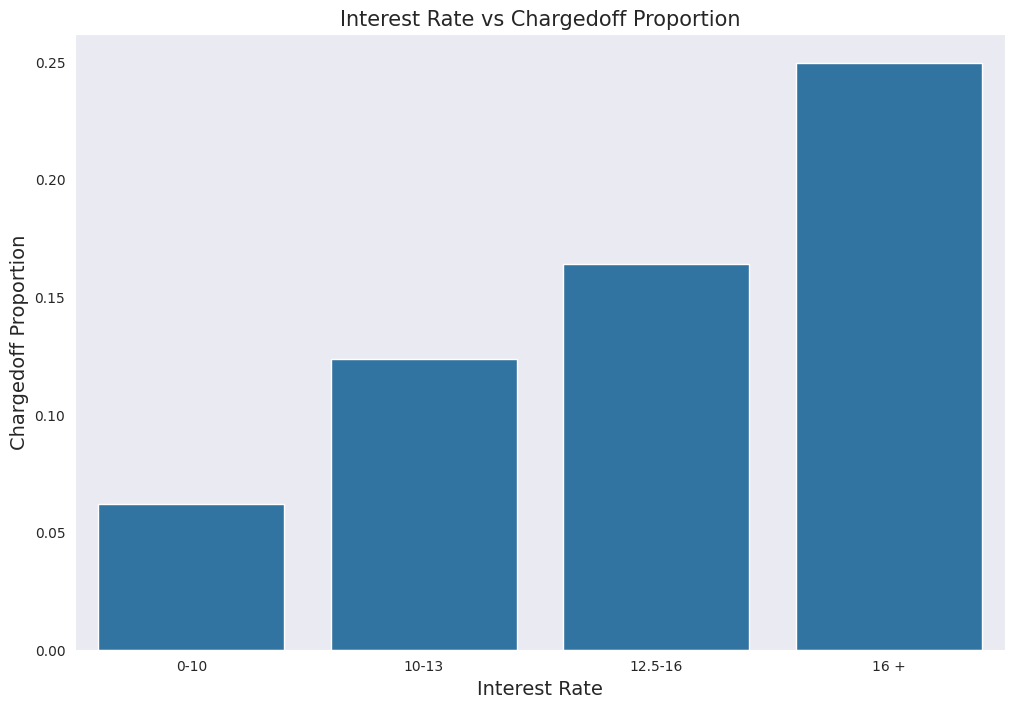

In [972]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [973]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loan_ds.groupby(['emp_length_in_years', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid']
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length_in_years,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,10,1069,285,5993,7347,0.145502
8,7,219,47,1282,1548,0.141473
9,8,173,38,1049,1260,0.137302
6,5,379,72,2395,2846,0.133169
1,1,372,59,2365,2796,0.133047
7,6,254,46,1626,1926,0.131880
4,3,470,63,3053,3586,0.131065
0,0,483,58,3229,3770,0.128117
5,4,377,77,2546,3000,0.125667
3,2,478,78,3290,3846,0.124285


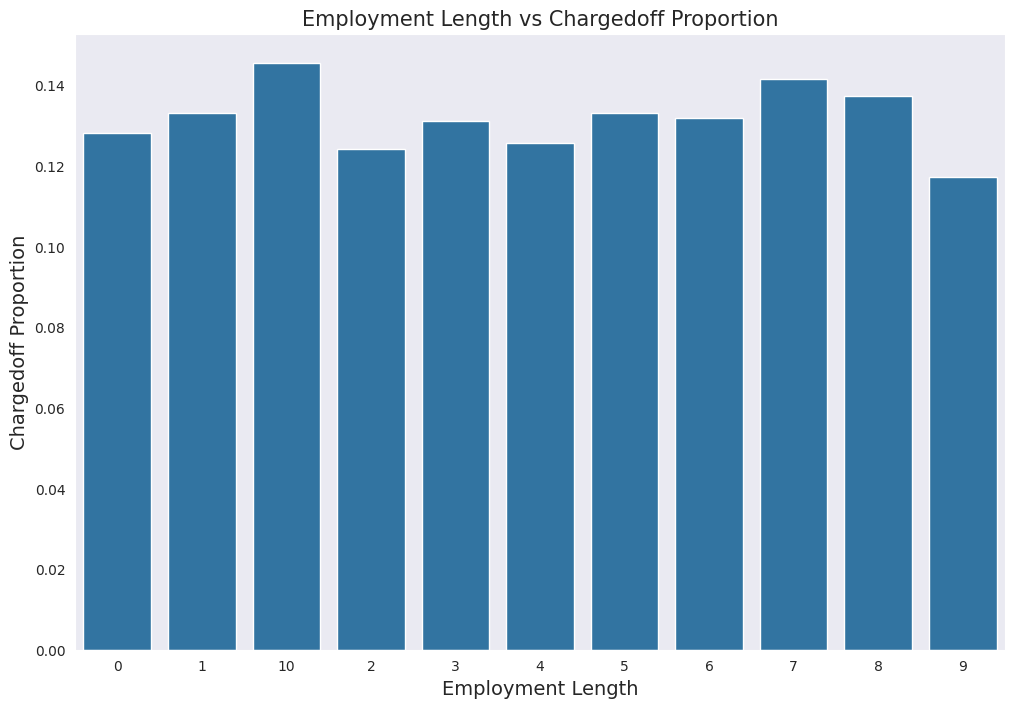

In [974]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='emp_length_in_years', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

In [975]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = loan_ds.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0)
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid']
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

loan_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
addr_state,,,,,
NV,88.0,15.0,316.0,419.0,0.210024
TN,2.0,0.0,8.0,10.0,0.200000
AK,11.0,1.0,52.0,64.0,0.171875
NM,26.0,3.0,124.0,153.0,0.169935
FL,389.0,60.0,1929.0,2378.0,0.163583
MO,89.0,13.0,471.0,573.0,0.155323
GA,176.0,24.0,949.0,1149.0,0.153177
HI,22.0,7.0,115.0,144.0,0.152778
OR,59.0,10.0,318.0,387.0,0.152455


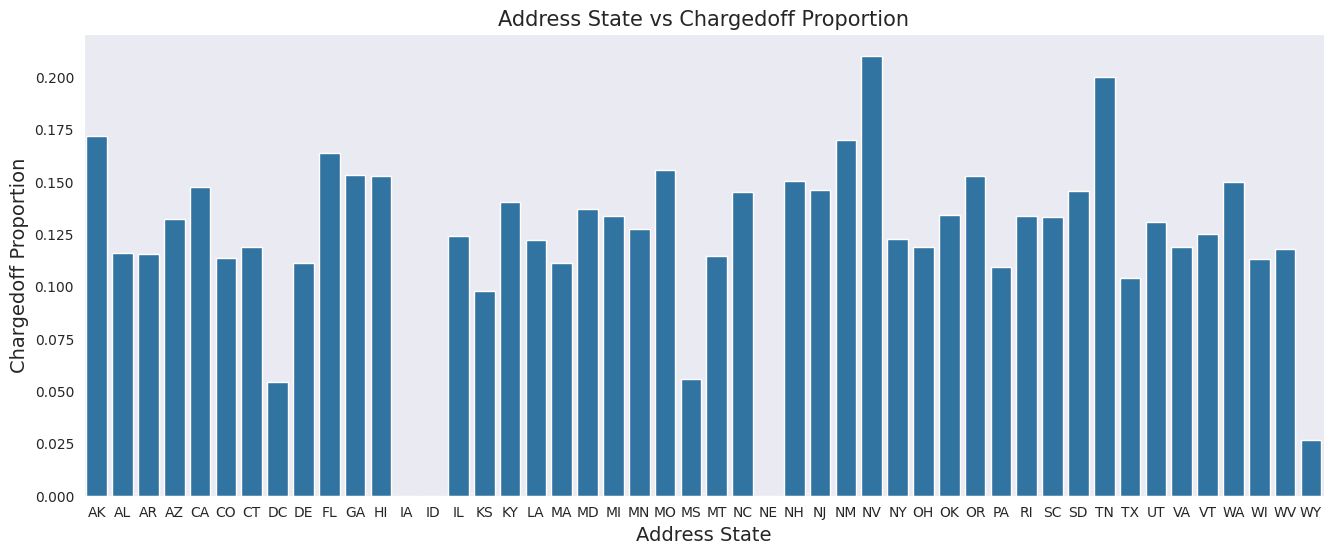

In [976]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

In [977]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loan_ds.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0)
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid']
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
verification_status,,,,,
Verified,1553,414,8087,10054,0.154466
Source Verified,1176,239,7175,8590,0.136903
Not Verified,1673,196,12504,14373,0.116399


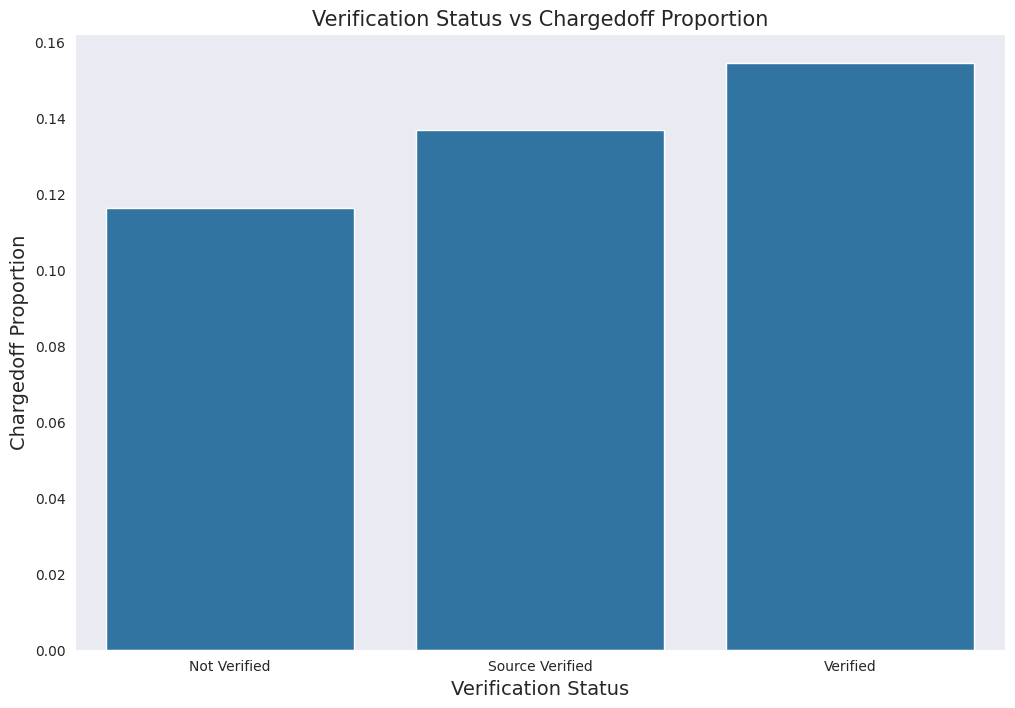

In [978]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [979]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = loan_ds.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0)
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
pub_rec_bankruptcies,,,,,
2.0,2,1,3,6,0.333333
1.0,286,25,1091,1402,0.203994
0.0,4114,823,26672,31609,0.130153


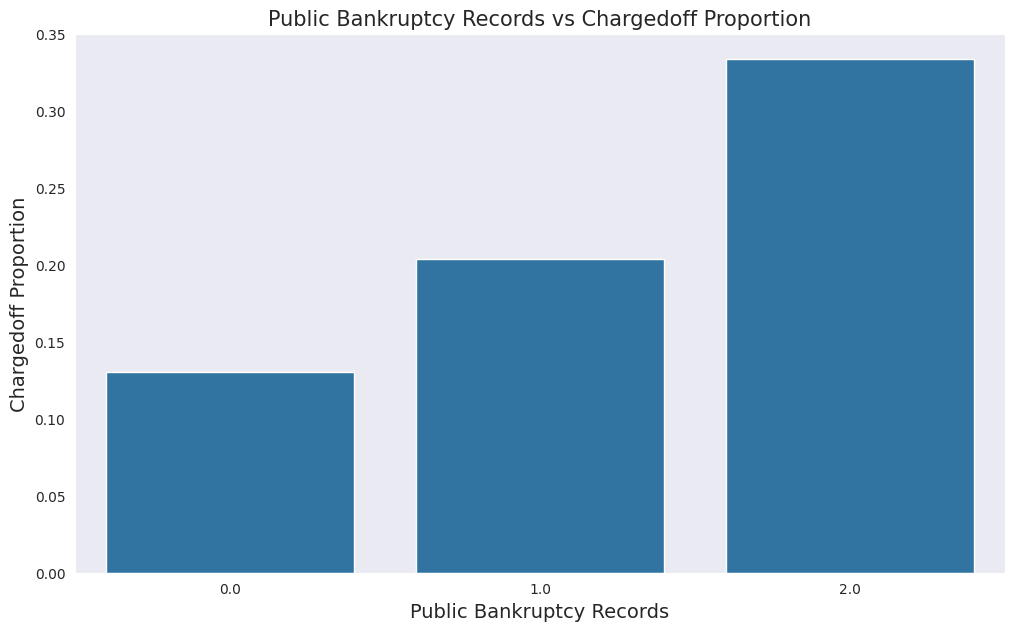

In [980]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well

In [981]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = loan_ds.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0)
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

loan_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
pub_rec,,,,,
2,10.0,2.0,31.0,43.0,0.232558
1,354.0,30.0,1331.0,1715.0,0.206414
0,4038.0,817.0,26397.0,31252.0,0.129208
3,0.0,0.0,5.0,5.0,0.000000
4,0.0,0.0,2.0,2.0,0.000000


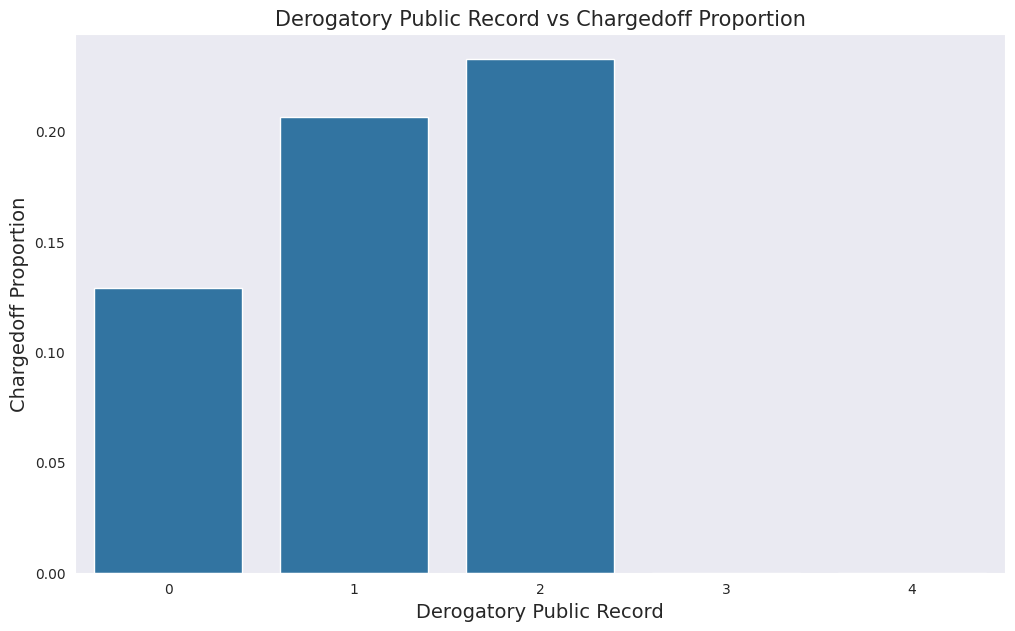

In [982]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

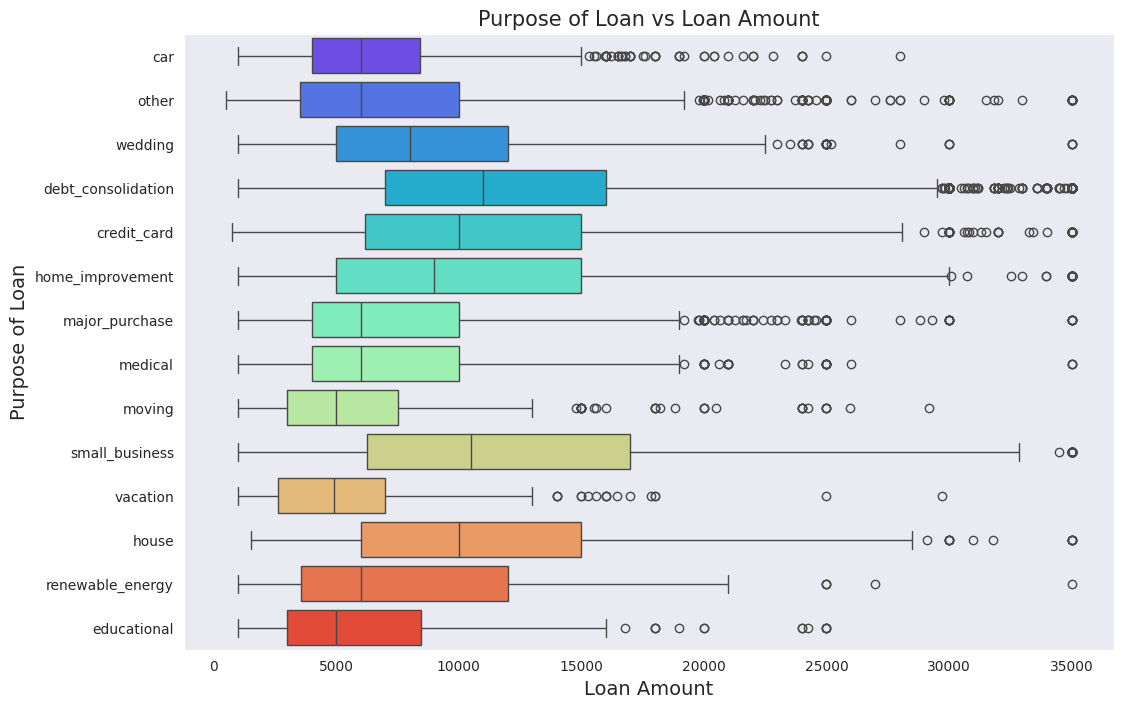

In [983]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan_ds,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15)
ax.set_ylabel('Purpose of Loan',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

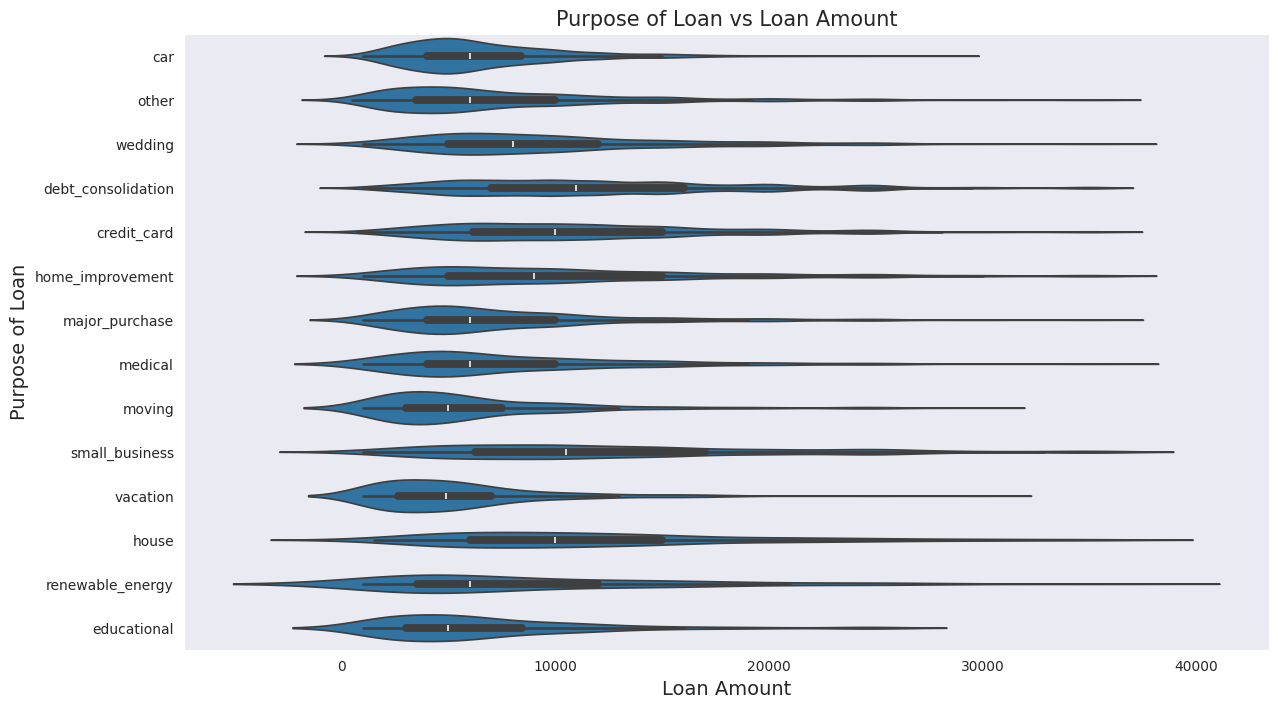

In [984]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables
# such that those distributions can be compared.

plt.figure(figsize=(14,8))
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loan_ds)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15)
ax.set_ylabel('Purpose of Loan',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

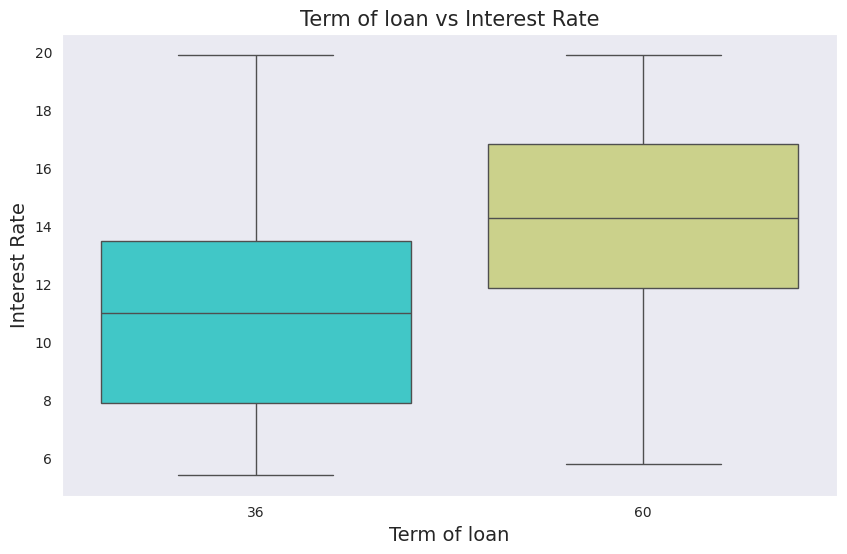

In [985]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6))
ax = sns.boxplot(y='int_rate', x='term_in_months', data =loan_ds,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Term of loan',fontsize=14)
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

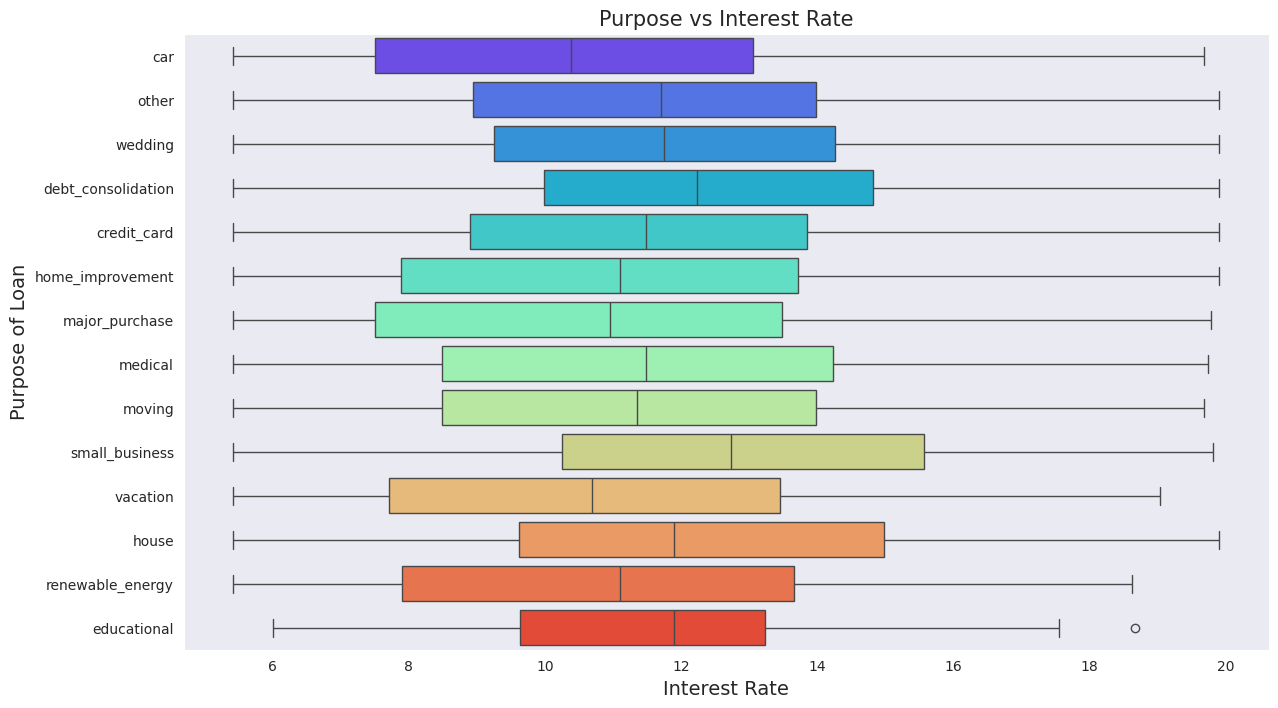

In [986]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_ds,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15)
ax.set_xlabel('Interest Rate',fontsize=14)
ax.set_ylabel('Purpose of Loan',fontsize=14)
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

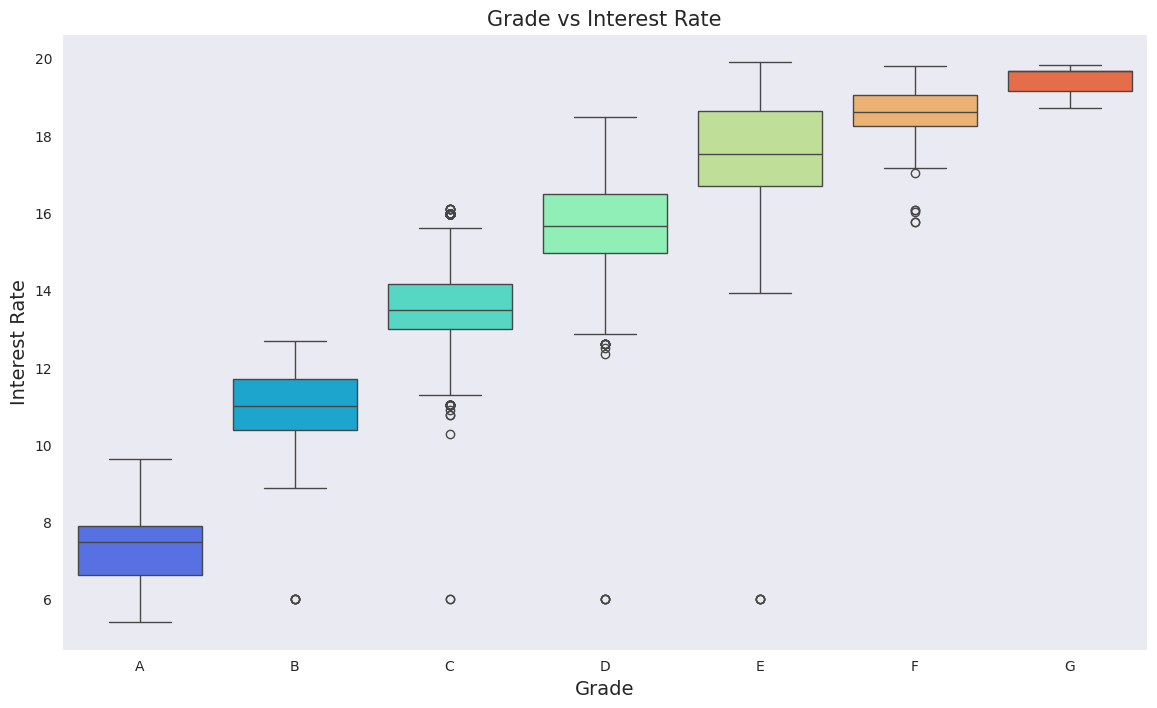

In [987]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='grade', data =loan_ds,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Grade',fontsize=14 )
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.

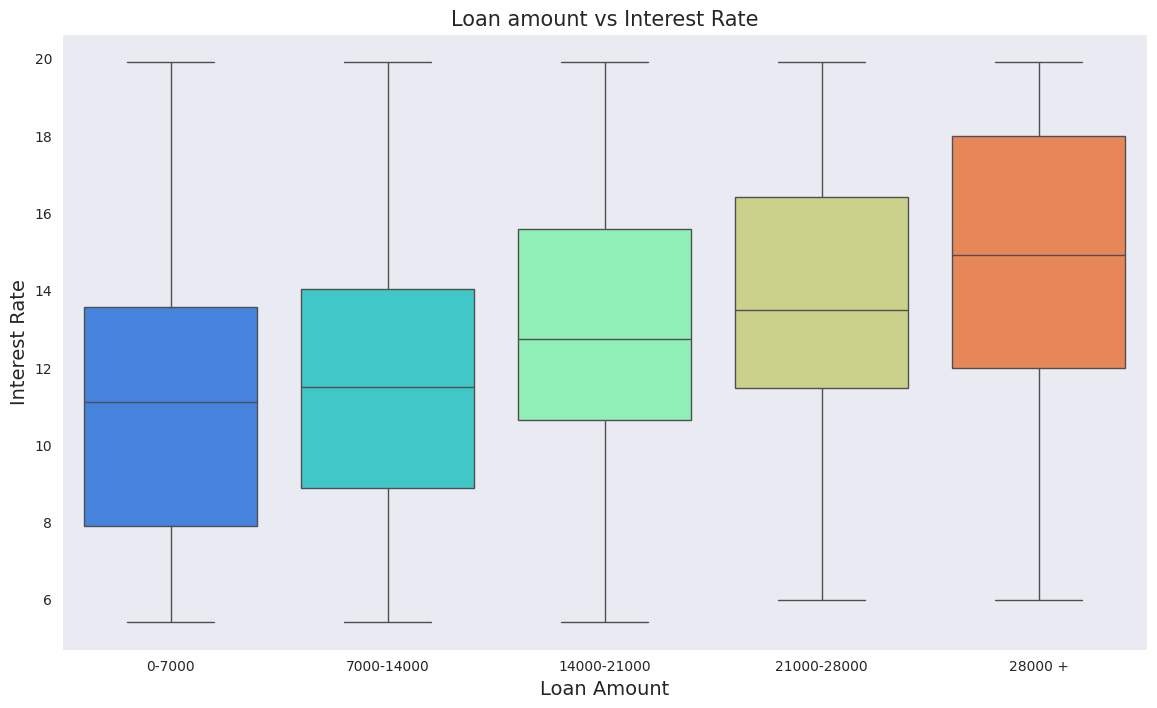

In [988]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan_ds,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

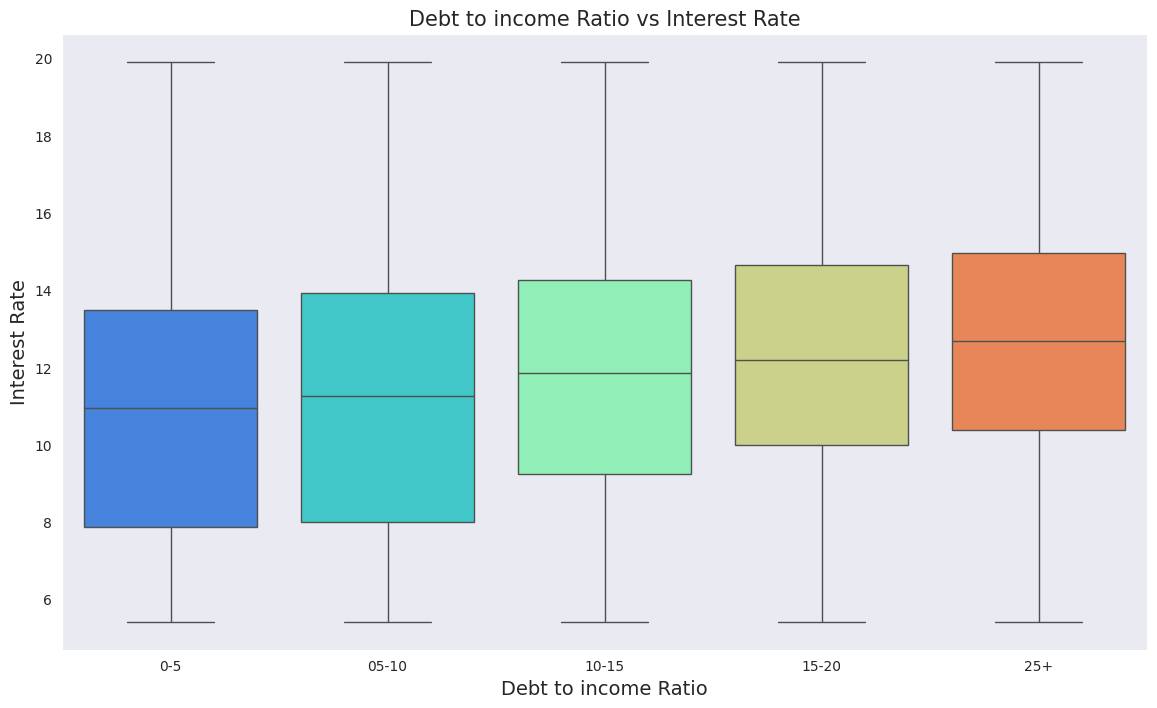

In [989]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan_ds,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Debt to income Ratio',fontsize=14)
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

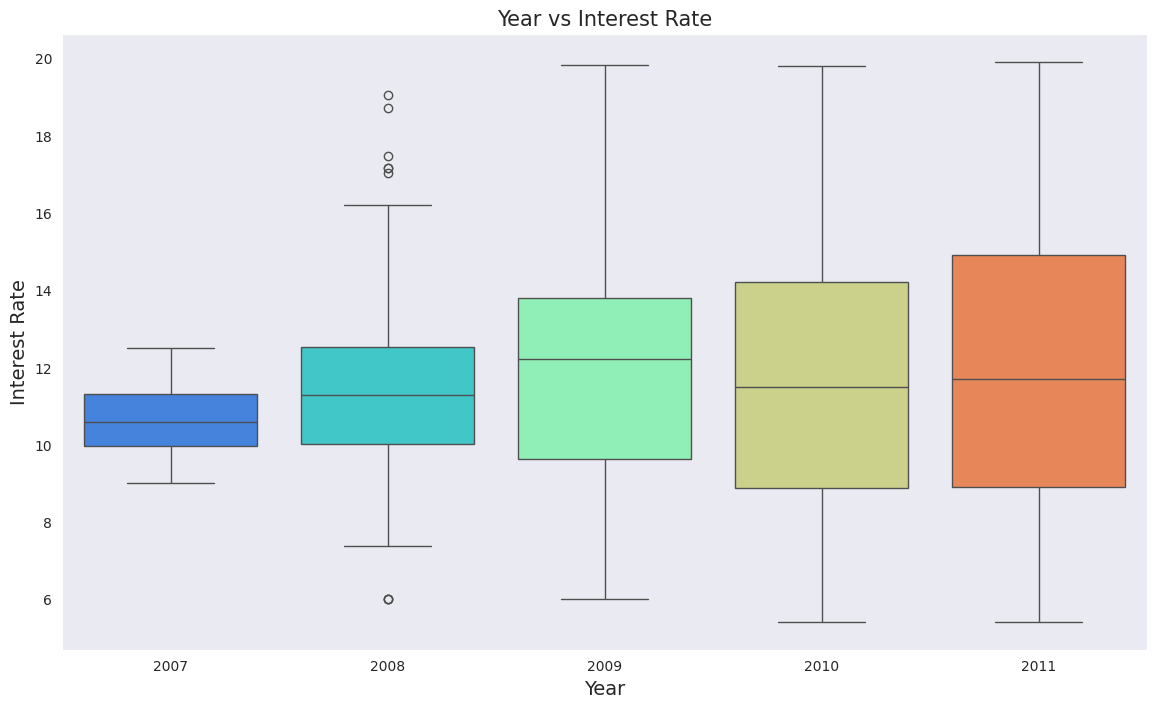

In [990]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='year', data =loan_ds,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

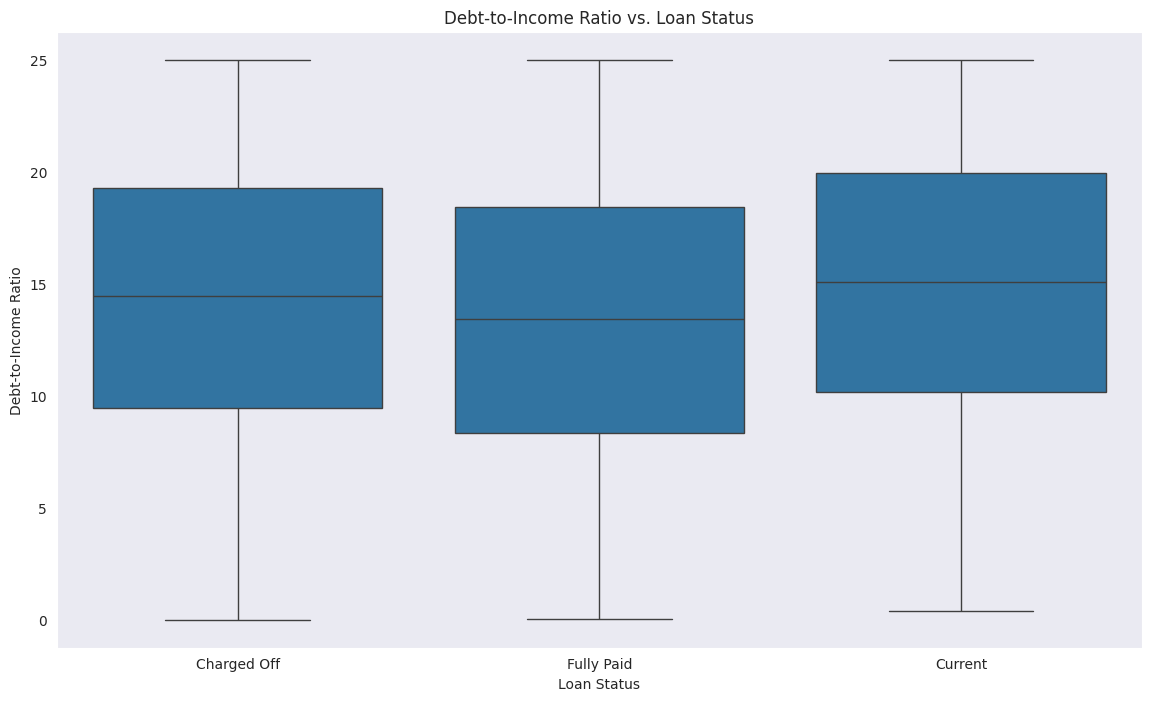

In [991]:
"""
The below distribution analyzes how the debt-to-income ratio relates to loan default

Borrowers with higher debt-to-income ratios seem more likely to have their loans charged off, while those with lower ratios tend to have loans that are currently active.

"""

plt.figure(figsize=(14, 8))
sns.boxplot(x='loan_status', y='dti', data=loan_ds)
plt.title('Debt-to-Income Ratio vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

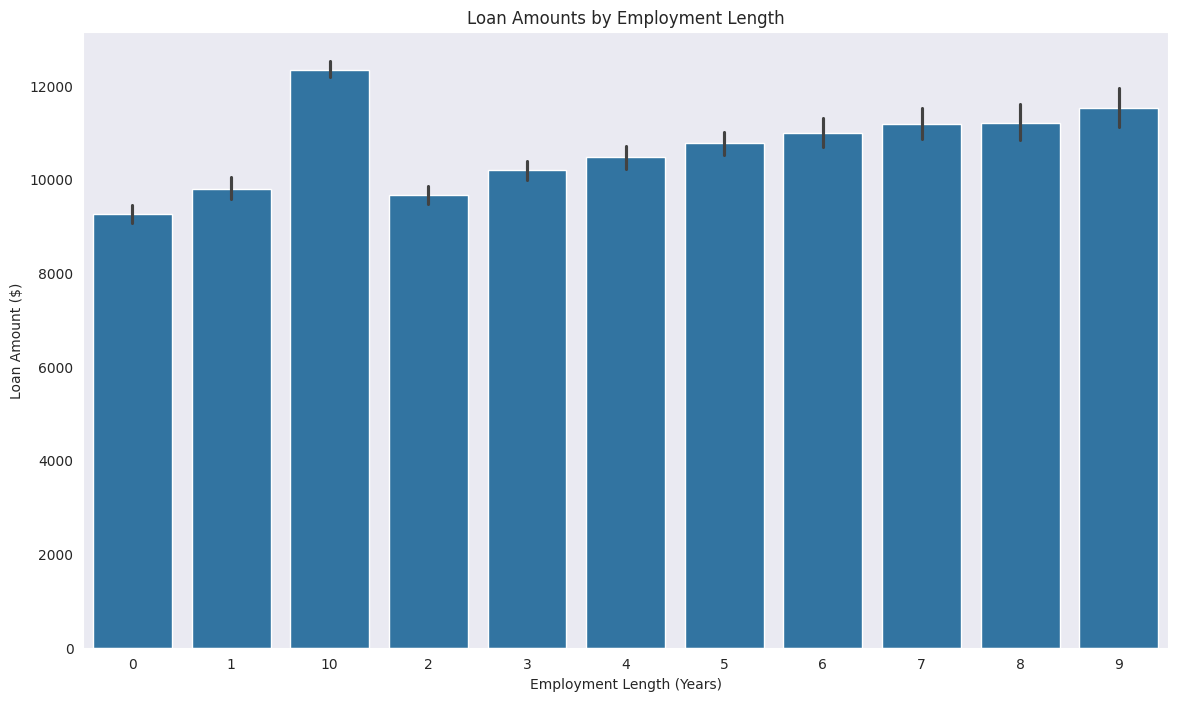

In [994]:
"""
The below distribution analyzes how longer employment histories correlate with higher loan amounts.

As noted, more loan amount is disbursed to borrowers with longer employment

"""

plt.figure(figsize=(14, 8))

# Bar plot for loan amounts by employment length
sns.barplot(x='emp_length_in_years', y='loan_amnt', data=loan_ds, order=sorted(loan_ds['emp_length_in_years'].unique()))
plt.title('Loan Amounts by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Loan Amount ($)')
plt.show()
